In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore

df = pd.read_excel('/content/Housing dataset.xlsx')
df

,id,Property location,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,Condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,Arizona,221900,3,1180,5650,1.0,0,0,1,7,1180,0,2001,0,98178,47.5112,-122.257,1340,5650
1,6414100192,Arizona,538000,3,2570,7242,2.0,0,0,1,7,2170,400,2000,2016,98125,47.7210,-122.319,1690,7639
2,5631500400,Arizona,180000,2,770,10000,1.0,0,0,1,6,770,0,2018,0,98028,47.7379,-122.233,2720,8062
3,2487200875,Arizona,604000,4,1960,5000,1.0,0,0,0,7,1050,910,2006,2020,98136,47.5208,-122.393,1360,5000
4,1954400510,Arizona,510000,3,1680,8080,1.0,0,0,1,8,1680,0,2021,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,Arizona,360000,3,1530,1131,3.0,0,0,1,8,1530,0,2009,2019,98103,47.6993,-122.346,1530,1509
21609,6600060120,Hawaii,400000,4,2310,5813,2.0,0,0,1,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,Arizona,402101,2,1020,1350,2.0,0,0,1,7,1020,0,2009,2019,98144,47.5944,-122.299,1020,2007
21611,291310100,Arizona,400000,3,1600,2388,2.0,0,0,1,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
# 1. Average price of properties in Arizona
average_price = df['price'].mean()
average_price

540088.1417665294

<Axes: xlabel='bedrooms', ylabel='price'>

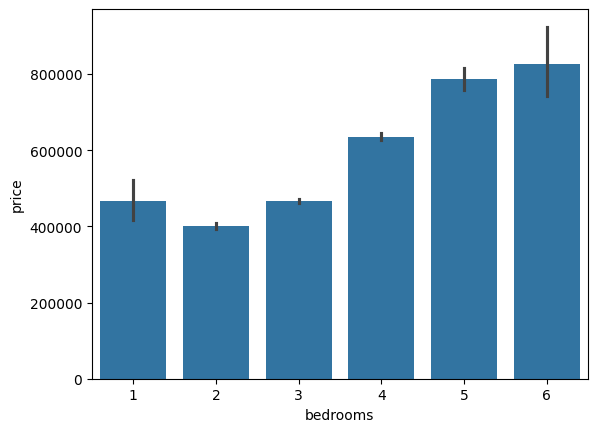

In [ ]:
# 2. Effect of bedrooms on price
sns.barplot(x='bedrooms', y='price', data=df)

In [ ]:
# 3. Correlation between square footage and price
correlation = df[['sqft_living', 'price']].corr()
correlation

,sqft_living,price
sqft_living,1.000000,0.702035
price,0.702035,1.000000


In [ ]:
# 4. Waterfront view vs non-waterfront price comparison
waterfront_prices = df.groupby('waterfront')['price'].mean()
waterfront_prices

waterfront
0    5.315636e+05
1    1.661876e+06
Name: price, dtype: float64

In [ ]:
# 6. Distribution of property grades
grade_distribution = df['grade'].value_counts()
grade_distribution

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64

<Axes: xlabel='yr_built', ylabel='price'>

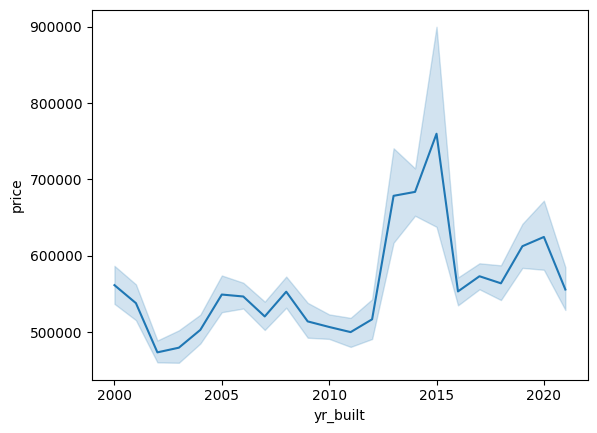

In [ ]:
# 7. Trends in year built vs current price
sns.lineplot(x='yr_built', y='price', data=df)

In [ ]:
# 8. Impact of renovation on price
renovated_prices = df.groupby('yr_renovated')['price'].mean()
renovated_prices

yr_renovated
0       558984.838088
2005    547639.701389
2007    518650.012658
2009    502083.284404
2010    431587.562500
2011    566200.481203
2012    538046.894915
2013    535140.478873
2015    516381.239344
2016    561013.394958
2017    548538.415916
2018    509081.817130
2019    523648.365227
2020    504897.280754
2021    478636.839695
Name: price, dtype: float64

In [ ]:
# 9. Predicting price based on location
X = df[['lat', 'long']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(f'Model Accuracy: {r2_score(y_test, predictions)}')

Model Accuracy: 0.08810933271364041


In [ ]:
# 10. Price difference between properties with and without a basement
basement_prices = df.groupby(df['sqft_basement'] > 0)['price'].mean()
basement_prices

sqft_basement
False    486884.090507
True     622373.563803
Name: price, dtype: float64

In [ ]:
# 11. Effect of lot size on price
lotsize_effect = df[['sqft_lot', 'price']].corr()
lotsize_effect

,sqft_lot,price
sqft_lot,1.000000,0.089661
price,0.089661,1.000000


In [ ]:
# 12. Relationship between neighboring properties and price
neighbors_effect = df[['sqft_living15', 'sqft_lot15', 'price']].corr()
neighbors_effect

,sqft_living15,sqft_lot15,price
sqft_living15,1.000000,0.183192,0.585379
sqft_lot15,0.183192,1.000000,0.082447
price,0.585379,0.082447,1.000000


In [ ]:
# 13. Identifying outliers
z_scores = np.abs(zscore(df['price']))
outliers = df[z_scores > 3]

outliers

,id,Property location,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,Condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21,2524049179,Arizona,2000000,3,3050,44867,1.0,0,4,0,9,2330,720,2007,2020,98040,47.5316,-122.233,4110,20336
153,7855801670,Arizona,2250000,4,5180,19850,2.0,0,3,0,12,3540,1640,2006,2020,98006,47.5620,-122.162,3160,9750
246,2025069065,Arizona,2400000,4,3650,8354,1.0,1,4,1,9,1830,1820,2000,2016,98074,47.6338,-122.072,3120,18841
269,7960900060,Arizona,2900000,4,5050,20100,1.5,0,2,1,11,4750,300,2016,0,98004,47.6312,-122.223,3890,20060
282,7424700045,Arizona,2050000,5,3830,8480,2.0,0,1,0,9,2630,1200,2006,2020,98122,47.6166,-122.287,3050,7556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21514,3262300818,Hawaii,1865000,4,3790,8797,2.0,0,0,1,11,3290,500,2006,0,98039,47.6351,-122.236,2660,12150
21530,8964800330,Hawaii,3000000,4,5090,14823,1.0,0,0,1,11,4180,910,2013,2020,98004,47.6200,-122.207,3030,12752
21540,715010530,Hawaii,1881580,5,4410,13000,2.0,0,3,1,10,2920,1490,2014,0,98006,47.5382,-122.111,5790,12969
21568,524059330,Hawaii,1700000,4,3830,8963,2.0,0,0,1,10,3120,710,2014,0,98004,47.5990,-122.197,2190,10777


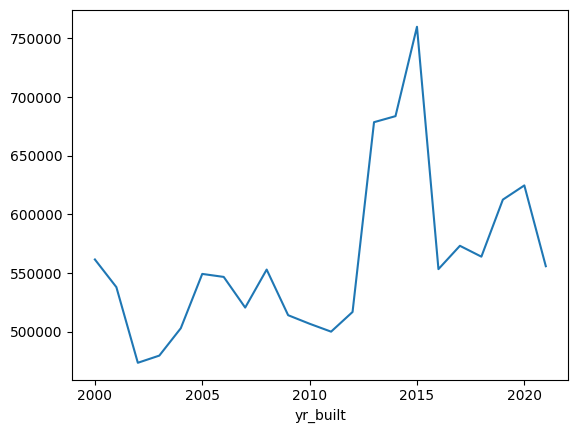

In [ ]:
# 14. Market changes over the years
yearly_trends = df.groupby(df['yr_built'])['price'].mean().plot()